Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

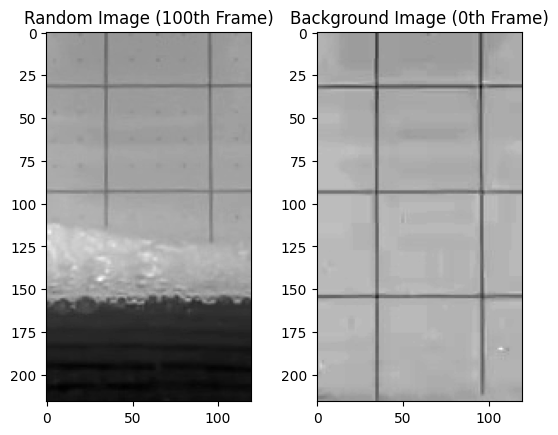

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


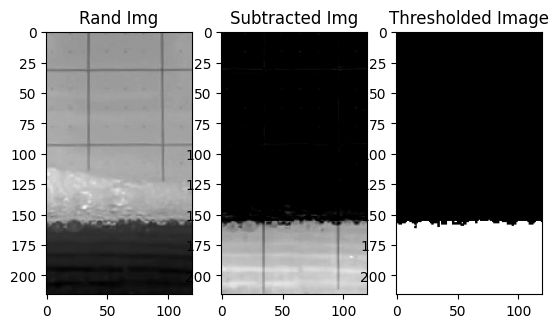

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

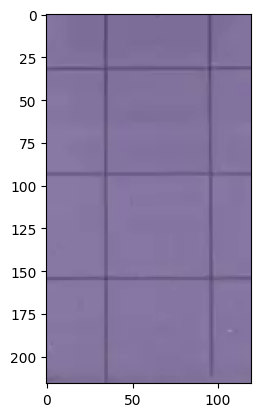

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



# `Answers (EGT/20/563 - S.M.H.D. SIRIWARDHANA) :`

## **01.Plot of Liquid Level 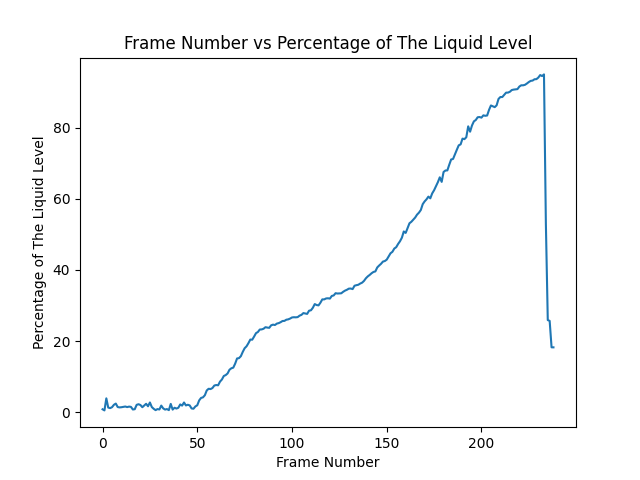**

## **02.Otsu's Thresholding Method:**

Otsu's thresholding is an image binarization technique that automatically determines the optimal threshold value for separating an image into foreground and background. Instead of manually specifying a threshold, Otsu's method analyzes the image's histogram to find the point that minimizes the overlap or variance between the two pixel intensity groups—those below and above the threshold.

A key insight is that Otsu's method works best for images with a bimodal histogram, where pixel intensities cluster around two distinct peaks representing the foreground and background regions. By minimizing the weighted within-class variance for these two groups, the method identifies the most appropriate threshold value that separates them.

What makes Otsu's method particularly valuable is its ability to automate threshold selection. This removes the need for manual intervention, making it useful for processing noisy or variable images. For example, the algorithm ensures that the threshold is chosen objectively, even for challenging conditions.

Additionally, Otsu's thresholding can be combined with preprocessing techniques, such as Gaussian filtering, to improve results by reducing noise. This is especially important when working with real-world images where noise can obscure histogram peaks, making threshold selection more difficult.

OpenCV provides a straightforward implementation of Otsu's method through the `cv.threshold()` function with the `cv.THRESH_OTSU` flag. Beyond this, the section also demonstrated a Python-based implementation, providing an understanding of how the algorithm calculates the optimal threshold by evaluating all possible values and selecting the one that minimizes within-class variances. This detailed explanation of the algorithm offers insights into the mathematical foundation and practical use of Otsu's method in image segmentation tasks.

## **03. 2 examples of probable erroraneous liquid level readings, when using Otsu's method.**

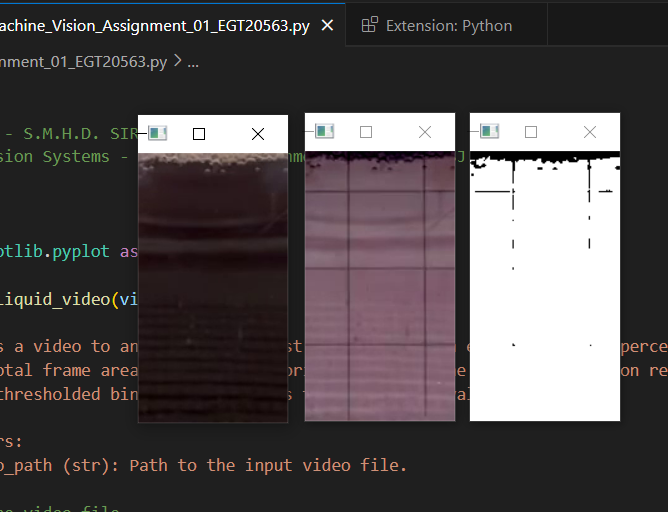
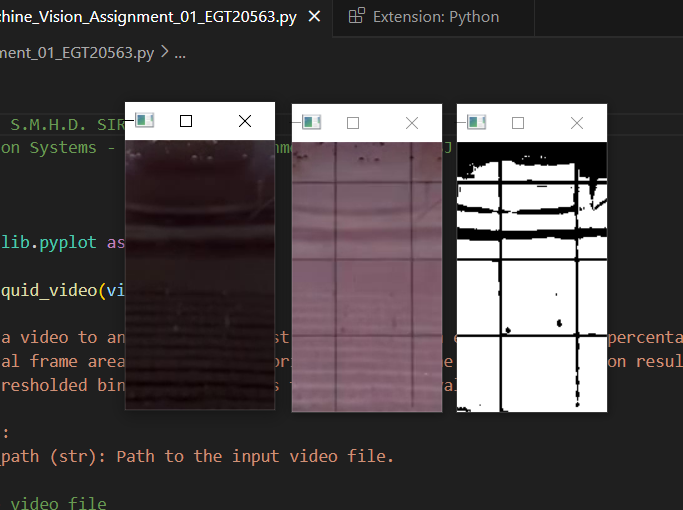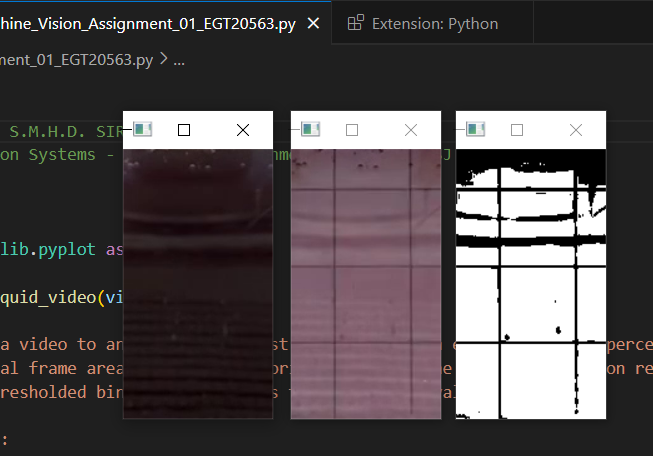


## **04. Brief Explanation of the developed algorithm**




This algorithm is designed to analyze the liquid level in a video by measuring changes in contour areas across frames.

1. **Video Input:**  
   The algorithm starts by opening the video file using OpenCV's `VideoCapture`. If the video cannot be opened, an error message is displayed.

2. **Background Initialization:**  
   The first frame of the video is read and used as a static background reference. This frame serves as the baseline to identify changes in subsequent frames.

3. **Frame Processing Loop:**  
   The algorithm processes each frame in a loop:
   - **Frame Reading:** Each frame is read sequentially. If there are no more frames, the loop terminates.
   - **Background Subtraction:** The difference between the background and the current frame is computed using OpenCV's `cv2.subtract` function. This highlights the regions that have changed, which are likely to contain liquid.
   - **Grayscale Conversion:** The subtracted image is converted to grayscale to simplify subsequent processing.
   - **Thresholding:** Otsu's thresholding method is applied to create a binary image. This isolates the regions of significant intensity change (potential liquid area).
   - **Contour Detection:** Contours are identified in the binary image using `cv2.findContours`. Contours represent boundaries of detected regions.
   - **Contour Area Calculation:** The area of the largest detected contour is calculated and expressed as a percentage of the total frame area.

4. **Data Storage and Visualization:**  
   The calculated percentage of the largest contour area is stored for each frame. This percentage is later plotted against the frame number to visualize changes over time, which can indicate the liquid level's behavior.

5. **Visualization of Results:**  
   - The original frame, subtracted frame, and thresholded binary frame are displayed in real-time.
   - The user can stop the process by pressing 'q'.
   - Finally, a plot showing the percentage of the largest contour area against frame numbers is generated to summarize the analysis.

6. **Resource Cleanup:**  
   At the end, the video file is released, and all OpenCV display windows are closed.

### Application:
This algorithm is particularly useful for monitoring liquid levels in transparent or semi-transparent containers in videos. It leverages image processing techniques to track variations in liquid boundaries efficiently, making it applicable to industrial and scientific tasks.

# **Final Algorithm**

In [ ]:


# EGT/20/563 - S.M.H.D. SIRIWARDHANA
# Machine Vision Systems - Take Home Assignment 01  - FOT USJ


import cv2
import matplotlib.pyplot as plt

def Analyze_Liquid_video(video_path):
    """
    Processes a video to analyze the largest contour area in each frame as a percentage
    of the total frame area. Displays the original video, the frame subtraction result,
    and the thresholded binary image. Plots the percentage values over time.

    Parameters:
        video_path (str): Path to the input video file.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    # Read the first frame to use as the background for subtraction
    ret, background = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return

    frame_no = 0  # Initialize frame counter
    percentages = []  # List to store contour area percentages

    while True:
        # Read the next frame from the video
        ret, frame = cap.read()
        if not ret:
            # Break the loop if there are no more frames
            break

        # Subtract the current frame from the background
        img_sub = cv2.subtract(background, frame)

        # Convert the subtracted image to grayscale
        img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

        # Apply a binary threshold to isolate differences
        #_, img_sub_thresh = cv2.threshold(img_sub_gray, 19, 255, cv2.THRESH_BINARY)

        # Apply Otsu's threholding method to obtain binary image
        _, img_sub_thresh = cv2.threshold(img_sub_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours in the thresholded image
        contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the percentage of the largest contour area relative to the frame area
        if contours:
            largest_contour_area = max(cv2.contourArea(c) for c in contours)
            frame_area = frame.shape[0] * frame.shape[1]
            percentage = (largest_contour_area / frame_area) * 100
        else:
            percentage = 0

        # Store the calculated percentage
        percentages.append(percentage)

        # Display the original frame, subtracted frame, and thresholded frame
        cv2.imshow('Original Frame', frame)
        cv2.imshow('Subtracted Frame', img_sub)
        cv2.imshow('Thresholded Frame', img_sub_thresh)

        # Exit the loop if the user presses 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_no += 1  # Increment the frame counter

    # Release video resources and close display windows
    cap.release()
    cv2.destroyAllWindows()

    # Plot the percentage of the largest contour area over frame numbers
    plt.plot(range(len(percentages)), percentages)
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of The Liquid Level')
    plt.title('Frame Number vs Percentage of The Liquid Level')
    plt.show()

# Call the function with the video path
video_path = 'demo2_images/liquidVideo.mp4'
Analyze_Liquid_video(video_path)
